# Intro to Artificial Neural Networks with Keras

ANNs are the core of **Deep Learning**

### Why this wave of interest in ANN's is unlike to die out like died the 1960s and 1980s
* ANN's frequently outperform other ML techniques on very large and complex problems;
* The increase in computer power since 1990s and cloud platforms have made training large neural networks accessible;
* The training algorithms have been improved since 1990s;
* ANNs seem to have entered a virtuous circle of funding and progress, as new products based on ANNs are launched more attention towards them are pulled.

## Logical Computations with Neurons

A simple model of a artificial neuron has on or more binary inputs and one binary output. The AN activates its output when more than a certain number of its inputs are active.

*Assumption: a neuron is activated when at least two inputs are active*

### Identity function
$C = A$

$A \Rightarrow C$

*if* A is activated *then* C is activated as well (since it receives two inputs signal)

### AND
$C = A \land B$

$A \rightarrow C \leftarrow B$

Neuron C is activated *if and only if* both A *and* B are activated.

### OR
$C = A \lor B$

$A \Rightarrow C \Leftarrow B$

Neuron C gets activated *if at least* neuron A *or* B is activated.

### When a input connection can inhibit the neuron's activity
$C = A \land \neg B$

$A \Rightarrow C \leftarrow \neg B$

Neuron C is activated *only if* A is activated *and* B is deactivated.

## The Perceptron
One of the simplest ANN architectures and it is based on a slightly different artificial neuron called *threshold logic unit* (TLU) or *linear threshold unit* (LTU). The inputs and outputs are numbers (instead of binary) and each input is associated with a weight. The TLU computes a weighted sum of its inputs
$$z = w_1x_1+w_2x_2+\cdots+w_nx_n = \mathbf{X}^{\top}\mathbf{W}$$
then applies a step function to that sum and outputs the result
$$h_{\mathbf{W}}(\mathbf{X}) = step(z)$$

Most common step function used in Perceptrons

$$ Heaviside (z) =
  \begin{cases}
    0       & \quad \text{if } z < t\\
    1  & \quad \text{if } z \geq t
  \end{cases}
$$


$$
sgn(z)=
\begin{cases}
-1 & \quad \text{if} z < t\\
0 & \quad \text{if} z = t\\
+1 &\quad \text{if} z> t
\end{cases}
$$


$$
\text{t: threshold}
$$

A single TLU would be used for simple linear classification like Logistic Regression or SVM classifier. Training a TLU in this case means finding the right values for $\mathbf{W}$

### Composition

A **Perceptron** is composed of a single layer of TLUs with each TLU connected to all inputs (when all neurons in a layer are connected to every single in the previous layer, the layer is called a *fully connected layer* or *dense layer*)

The inputs of the Perceptron are fed to special passthrough neurons called input neurons: they output whatever input they are fed. In addition, an extra bias feature is generelly added ($x_0=1$), it's represented using a neuron called *bias neuron*, which outputs 1 all the time.

$$h_{\mathbf{W, b}}=\phi(\mathbf{XW}+b)$$
Where:  
$\mathbf{X}$: matrix($m\times n$) of input features.  
$\mathbf{W}$: matrix($n\times j$) of connection weights one column ($j$) per artificial neuron in the layer.  
$\mathbf{b}$: bias terms vector ($j$) contains all the connection weights between the bias neuron and the artificial neurons. It has one bias term per artificial neuron.$

The function $\phi$ is called activation function

### How is a Perceptron trained?
Hebb's rule: The connection weight between two neurons tends to increase when they fire simultaneously

A variant of the rule takes into account the error made by the network when making a prediction. **The Perceptron learning rule reinforces connections that help reduce the error**.

$$W_{i, j}^{\text{next step}}=W_{i, j}+\eta(y_j-\hat{y}_j)x_i$$

Where:  
$w_{i, j}$ is the connection weight between the $i^{th}$ input neuron and the $j^{th}$ output neuron. 
$x_i$ is the $i^{th}$ input value of the current training instance.  
$\hat{y}_j$ is the output of the $j^{th}$ output neuron for the current training instance.  
$y_j$ is the target output of the $j^{th}$ output neuron for the current training instance.  
$\eta$ is the learning rate.  

The decision boundary of each output neuron is linear, so Perceptron are incapable of learning complex patterns. However, if the training instances are linearly separables the algorithm would converge to a solution (*Perceptron convergence theorem*)


In [1]:
# Imports
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import numpy as np
import os

In [2]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [3]:
iris = load_iris()
X = iris.data[:, (2, 3)] # petal length and petal width
y = (iris.target == 0).astype('int')

per_clf = Perceptron()
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

`Perceptron` in scikit-learn is equivalent to using an `SGDClassifier` with the fallowing hyperparameters:  
`loss='perceptron'`  
`learning_rate='constant'`  
`eta0='1'`  
`penalty=None`  

*Contrary to Logistic Regression classifier, Perceptrons do not output a class probability, rather they make predictions based on hard threshold. This is one reason to **prefer** Logistic Regression over Perceptrons*

**Perceptron are incabable of solving some trivial problems like *Exclusive OR (XOR)* classification problem. However some of the limitations of perceptrons can be solved by stacking multiple Perceptrons (called Multilayer Perceptron (MLP)).

## The Multilayer Perceptron and Backpropagation
An MLP is composed of one input layer, one or more layers of TLUs (hidden layers) plus a final TLUs' layer called the output layer.

The layers close the input are called *lower layers* and those close to the output *upper layers*. Every layer except the output one includes a bias neuron and is fully connected to the next layer.

**Note**: The signal flows only in one direction (from the inputs to outputs), this architecture is an example of *feedforward neural network (FNN)*.

**The backpropagation** training algorithm in short is a Gradient Descent using an efficient technique for computing the gradients automatically. In just two pass through the (one forward and one backward), the backpropagation algorithm is able to compute the gradient of the network's error with regard to every single model parameter. In other words, it can find out how each connection weight and each bias term should be tweaked in order to reduce the error. Once it has there gradients it just performs a regular gradient descent step, and the whole process is repeated until the network converge to the solution.

**Note**: Automatically computing gradients is called *automatic differentiation*, or *autodiff*. There are various techniques. the one used by backpropagation is called *reverse-mode autodiff*

### The algorithm
* handles one mini-batch at a time. It goes through the training set multiple times (**Epochs**).
* The weights must be randomly initiated.
* The algorithm computes the output of all neurons in each layer until the last layer (**forward pass**) and all intermediates results are preserved.
* The algorithm computes the network's output error (using a loss function).
* Compute how much each output connection contributed to the error (chain rule) and how much of these error contributions come from each connection in the layer below and so on until reaches the input layer. This measures the error gradient across all connection weights in the network by propagating the error backward (**backward pass**).
* Finally the algorithm performs a Gradient Descent step to tweak all connection weights in the network using error gradient computed.

**Gradiant Descent needs a well-defined non-zero derivative function to make progress at every step. Initially  this function was the sigmoid function**
$$\sigma(z)=\frac{1}{1+e^{-z}}$$
**Other choices:**
$$tanh(z)=2\sigma(2z)-1$$
Unlike the sigmoid its output range from $-1$ to $1$ (instead of $0$ to $1$), and the range tends to make each layer's output centered around $0$ at the beginning of training speeding up convergence.
$$ReLU(z)=max(0,z)$$
Not differentiable at $z=0$ and the derivative is $0$ for $z<0$, but in practice it works well and is fast to compute (has become the default).

**A large enough DNN with nonlinear activations can theoretically approximate any continuous function**

## Regression MLPs

When building an MLP for regression, one don't want use any activation function for the output neurons and they can output any value. To Guarantee positive outputs use *ReLU* activation function or *softplus* ($log(1+exp(z))$). 

**TIP:** The Huber loss is quadratic when the error is smaller than a threshold $\delta$ (tipically 1) but linear when larger than $\delta$. 

### Typical regression MLP architecture

|**Hyperparameter**|**Typical value**|
|-|-|
|input neurons|One per feature|
|hidden layers| Typically 1 to 5|
|neurons per hidden layer|Typically 10 to 100|
|output neurons|1 per prediction dimension|
|Hidden activation|ReLU or SELU|
|Output Activation|None, Or ReLU/softplus(if positive) or logistic/tanh (if bounded)|
|loss function| MSE or MAE/Huber|

## Classification MLPs
* For binary classification problem: Single output neuron using the logistic activation function: the output will be a number between 0 and 1 (probability estimation of the positive class).  
* For multilabel binary classification: One neuron per positive class.  
* For multiclass classification: One neuron per class and a softmax activation function.

Regarding the loss function, cross-entropy (log loss) is usually good. as the objective is to predict probability distributions.

### Typical classification MLP architecture

|**Hyperparameter**|**Binary**|**Multilabel Binary**|**Multiclass**|
|-|-|-|-|
|input neurons and hidden layers|Same as regression|Same as regression|Same as regression|
|output neurons|1|1 per label|1 per class|
|Output Activation|logistic|logistic|softmax|
|loss function|Cross entropy|Cross entropy|Cross entropy|

## Implementing MLPs with Keras

Docs: [Keras](https://keras.io/)



In [12]:
import tensorflow as tf
from tensorflow import keras

In [13]:
tf.__version__

'2.6.0'

In [14]:
keras.__version__

'2.6.0'

### Building an Image Classifier Using the sequencial API


In [15]:
fashion_mnist = keras.datasets.fashion_mnist

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [16]:
X_train_full.shape

(60000, 28, 28)

In [17]:
X_train_full.dtype

dtype('uint8')

In [18]:
# Create validation set and scaling the input features

X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

# Class names
class_names = ['T-shirt/top', 'Trouser', 'pullover', 'dress',
              'coat', 'sandall', 'shirt', 'sneaker', 'bag', 'ankle boot']

In [19]:
class_names[y_train[0]]

'coat'

In [20]:
# Create the model
model = keras.models.Sequential()    # Simplest keras model for neural nets.
                                     # Composed of a single stack of layers connected sequentially.
model.add(keras.layers.Flatten(input_shape=[28, 28]))    # First layer. `flatten` to convert each
                                                         # image into 1D array. Compute X.reshape(-1, 28*28)
model.add(keras.layers.Dense(300, activation='relu'))    # `Dense` hidden layer with 300 neurons with ReLU
                                                         # as activation function. Each one manages its own
                                                         # weight matrix and a vector of bias terms (one per neuron)
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))    # a `Dense` output layer with 10 neurons (one per class)
                                                           # using softmax activation because the classes are exclusive
    


In [46]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [47]:
# Can be set as follow as well
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


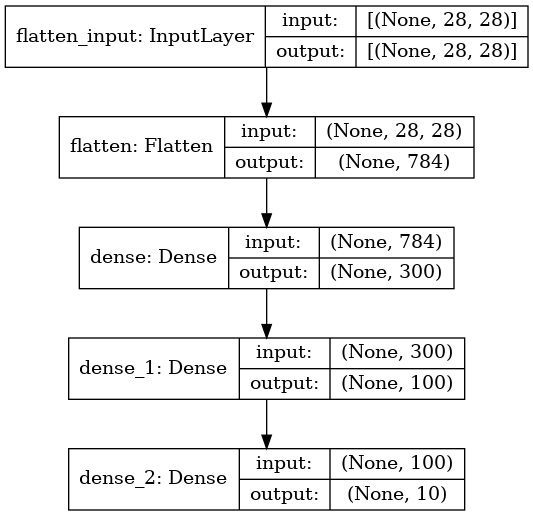

In [49]:
keras.utils.plot_model(model, show_shapes=True)

In [50]:
model.layers

In [51]:
model.layers[1].name

'dense'

In [53]:
model.get_layer('dense')

# Activation Functions
(ageron notebook)


In [32]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

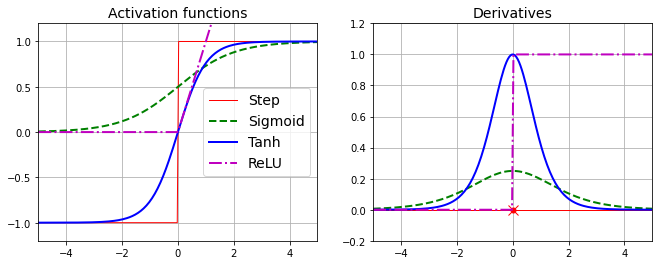

In [35]:
import numpy as np
import matplotlib.pyplot as plt

z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])


plt.show()



In [54]:
# Paramets from a layer
# Weights
model.layers[1].get_weights()[0].shape

(784, 300)

In [55]:
# Biases
model.layers[1].get_weights()[1].shape

(300,)

### Compiling the model
Call the `compile()` to specify the loss function and the optimizer to use.

In [56]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer=keras.optimizers.SGD(learning_rate=0.01),
             metrics=['accuracy'])

**TIP** to convert sparse labels (class indices) to one-hot vector labels, use `keras.utils.to_categorical()` function. other way, `np.argmax()` function with `axis=1`

### Training and evaluating the model

In [58]:
history = model.fit(X_train, y_train, epochs=30,
                   validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2207 - accuracy: 0.9198 - val_loss: 0.2888 - val_accuracy: 0.8954
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2175 - accuracy: 0.9223 - val_loss: 0.2902 - val_accuracy: 0.8972
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2140 - accuracy: 0.9223 - val_loss: 0.3696 - val_accuracy: 0.8658
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2104 - accuracy: 0.9254 - val_loss: 0.2920 - val_accuracy: 0.8968
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2086 - accuracy: 0.9244 - val_loss: 0.2806 - val_accuracy: 0.8986
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2033 - accuracy: 0.9271 - val_loss: 0.2970 - val_accuracy: 0.8936
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2004 - accuracy: 0.9294 - val_loss: 0.2925 - val_accuracy:

**TIP** instead of using the argument `validation_data` one can use `validation_split` to the ratio of the training set.

`class_weight` argument handles unbalanced classes.

`sample_weight` argument is usefull when some instances are labeled by experts and others by other source. This can also be used inside `validation_data` as a third item in a tuple.

`fit()`returns a `History` object with the following attributes. 
`.params`, `.epoch`, `.history`

In [59]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [63]:
history.epoch

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

<AxesSubplot:>

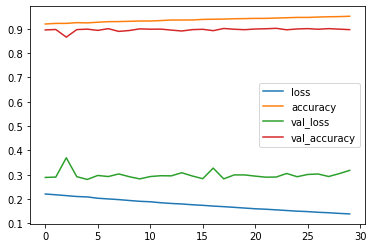

In [67]:
import pandas as pd
pd.DataFrame(data=history.history).plot()
